In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import *

# **Exploration des données**

In [ ]:
# Chemins des répertoires d'entraînement et de test
train_dir = '/content/drive/MyDrive/archive/train'
test_dir = '/content/drive/MyDrive/archive/test'

# Chargement des datasets
train_dataset = datasets.ImageFolder(root=train_dir)
test_dataset = datasets.ImageFolder(root=test_dir)

# Chargement des DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Vérifier les classes
print("Classes d'émotions:", train_dataset.classes)


Classes d'émotions: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Distribution des classes dans le jeu de données d'entraînement:
angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images


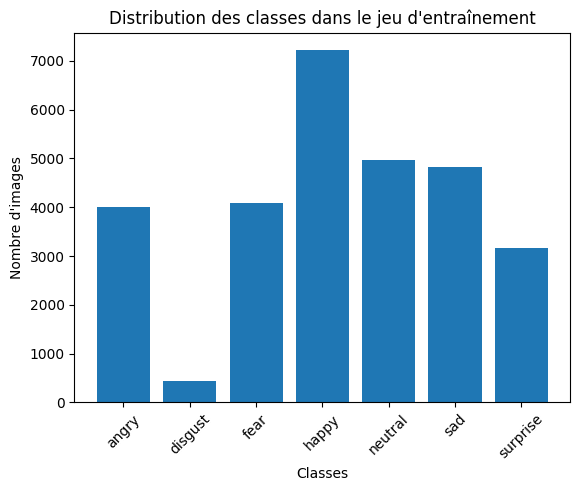

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vérifier la distribution des classes (nombre d'images par classe)
class_counts = {cls: 0 for cls in train_dataset.classes}
for _, label in train_dataset.samples:
    class_counts[train_dataset.classes[label]] += 1

print("Distribution des classes dans le jeu de données d'entraînement:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Visualisation de la distribution des classes
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des classes dans le jeu d\'entraînement')
plt.xticks(rotation=45)
plt.show()




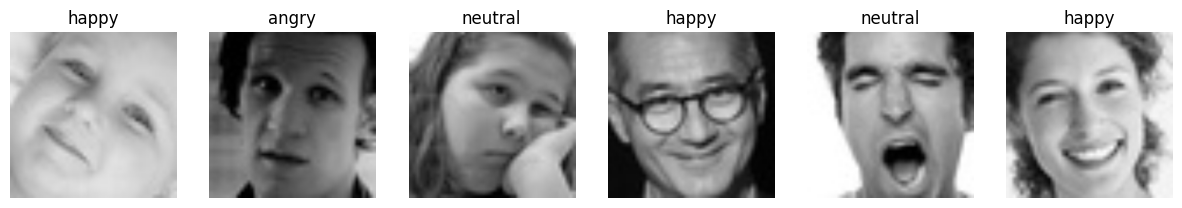

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
import random

# Transformation pour convertir les images en tenseurs
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # Convertit l'image en tenseur
])

# Charger les datasets avec la transformation
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Chargement des DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Afficher quelques exemples d'images de l'ensemble d'entraînement (avec sélection aléatoire)
def show_images(dataset, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    indices = random.sample(range(len(dataset)), num_images)  # Sélectionner des indices aléatoires
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image = np.transpose(image.numpy(), (1, 2, 0))  # Convertir pour l'affichage
        axes[i].imshow(image)
        axes[i].set_title(dataset.classes[label])
        axes[i].axis('off')
    plt.show()

# Appliquer à l'ensemble d'entraînement
show_images(train_dataset)


In [ ]:
def load_data(path):
    X,y=[],[]
    for label in os.listdir(path):
        for pic in os.listdir(os.path.join(path,label)):
            img_path=os.path.join(path,label,pic)
            X.append(plt.imread(img_path))
            y.append(labels.index(label))
    return X,y

In [ ]:
labels=os.listdir(train_dir)

In [ ]:
X_train,y_train=load_data(train_dir)
X_test,y_test=load_data(train_dir)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train.shape

(28709, 48, 48)

# **Préparation des données**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2

# Fonction pour compter les classes dans le dataset
def Classes_Count(path, name):
    Classes_Dict = {}
    for Class in os.listdir(path):
        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))
    df = pd.DataFrame(Classes_Dict, index=[name])
    return df

# Chemins des données
train_dir = '/content/drive/MyDrive/archive/train'
test_dir = '/content/drive/MyDrive/archive/test'

# Compter les classes dans les datasets d'entraînement et de test
Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)
class_count_df = pd.concat([Train_Count, Test_Count], axis=1)
print(class_count_df)

# Paramètres des images
img_shape = 224
batch_size = 64

# ImageDataGenerator pour les données d'entraînement et de test
train_preprocessor = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_preprocessor = ImageDataGenerator(rescale=1 / 255.0)

# Chargement des données d'entraînement
train_data = train_preprocessor.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape, img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Chargement des données de test
test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape, img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)


          Train  Test
happy      7215  1774
neutral    4965  1233
sad        4830  1247
fear       4097  1024
angry      3995   958
surprise   3171   831
disgust     436   111
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
def one_hot(Y):
    Y_oh=np.zeros((len(Y),len(labels)))
    for i in range (len(Y)):
        Y_oh[i,Y[i]]=1
    return Y_oh

In [ ]:
y_train_oh=one_hot(y_train)
y_test_oh=one_hot(y_test)

In [ ]:
from sklearn.utils import shuffle
X_train_s,y_train_oh_s=shuffle(X_train,y_train_oh)
X_test_s,y_test_oh_s=shuffle(X_test,y_test_oh)


# **Création du modèle**





In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential([
    Conv2D(16,(3,3),1,activation='relu',input_shape=(48,48,1),padding='same'),
    MaxPooling2D(),
    Conv2D(32,(3,3),1,activation='relu'),
    Conv2D(16,(3,3),1,activation='relu'),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(7,activation='sigmoid')

])
model.summary()
model.compile(loss='BinaryCrossentropy',metrics=["accuracy"],optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,649,879 (6.29 MB)

 Trainable params: 1,649,879 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

# **Augmentation des données**

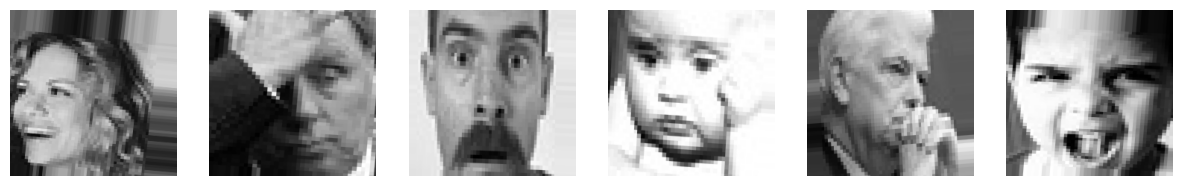

In [ ]:
def show_augmented_images(generator, num_images=6):
    images, labels = next(generator)  # Obtenir un lot d'images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image = images[i]
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Afficher quelques images augmentées à partir de l'ensemble d'entraînement
show_augmented_images(train_data)

# **Entraînement du modèle**



In [ ]:
history=model.fit(X_train_s,y_train_oh_s,epochs=10,batch_size=32)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 87s 95ms/step - accuracy: 0.3059 - loss: 0.5054
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.4246 - loss: 0.3363
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.4989 - loss: 0.3013
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 93ms/step - accuracy: 0.5906 - loss: 0.2583
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 94ms/step - accuracy: 0.6926 - loss: 0.2065
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.7864 - loss: 0.1559
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 92ms/step - accuracy: 0.8597 - loss: 0.1147
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 93ms/step - accuracy: 0.9052 - loss: 0.0872
Epoch 9/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 95ms/step - accuracy: 0.9341 - loss: 0.0677
Epoch 10/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 144s 98ms/step - accuracy: 0.9546 - loss: 0.0546


# **Évaluation finale**

In [ ]:
from tensorflow.keras.metrics import  CategoricalAccuracy
X_test_s.shape

(28709, 48, 48)

In [ ]:
y_hat=model.predict(X_test_s)
acc = CategoricalAccuracy()
acc.update_state(y_test_oh_s,y_hat)
print("Accuracy:", acc.result().numpy())


898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step
Accuracy: 0.9638441


In [ ]:
import numpy as np

# Prédire les classes sur l'ensemble de test
y_hat = model.predict(X_test_s)

# Convertir les probabilités en classes
y_pred = np.argmax(y_hat, axis=1)  # pour les prédictions
y_true = np.argmax(y_test_oh_s, axis=1)  # pour les vraies étiquettes


898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step


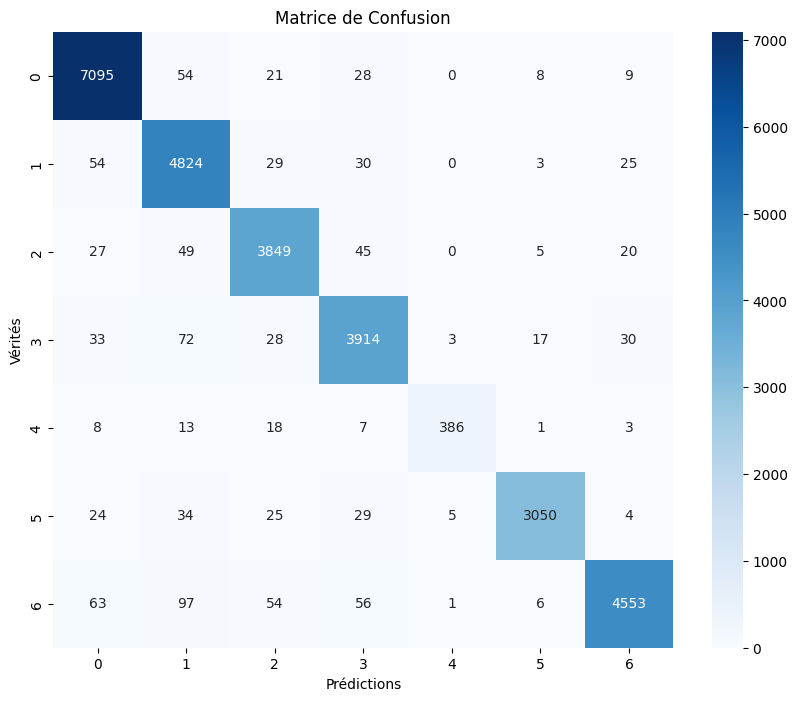

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Rapport de Classification:")
print(classification_report(y_true, y_pred, target_names=[f'Classe {i}' for i in np.unique(y_true)]))


Rapport de Classification:
              precision    recall  f1-score   support

    Classe 0       0.97      0.98      0.98      7215
    Classe 1       0.94      0.97      0.95      4965
    Classe 2       0.96      0.96      0.96      3995
    Classe 3       0.95      0.96      0.95      4097
    Classe 4       0.98      0.89      0.93       436
    Classe 5       0.99      0.96      0.97      3171
    Classe 6       0.98      0.94      0.96      4830

    accuracy                           0.96     28709
   macro avg       0.97      0.95      0.96     28709
weighted avg       0.96      0.96      0.96     28709

